In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" dire ctory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/web-traffic-time-series-forecasting/sample_submission_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/sample_submission_1.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/train_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/key_1.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/key_2.csv.zip
/kaggle/input/web-traffic-time-series-forecasting/train_1.csv.zip


In [2]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftfreq

Load the training data.

In [3]:
train_data = pd.read_csv(os.path.join(dirname, 'train_2.csv.zip'),compression = "zip")

In [4]:
train_data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [5]:
train_data.shape

(145063, 804)

The training data consists of 145063 time series, with daily views of websites from July, 1st, 2015 until September 10th, 2017. The goal is to predict daily views between between September 13th, 2017 and November 13th, 2017.

To explore the data, I began making time plots of selected data series.

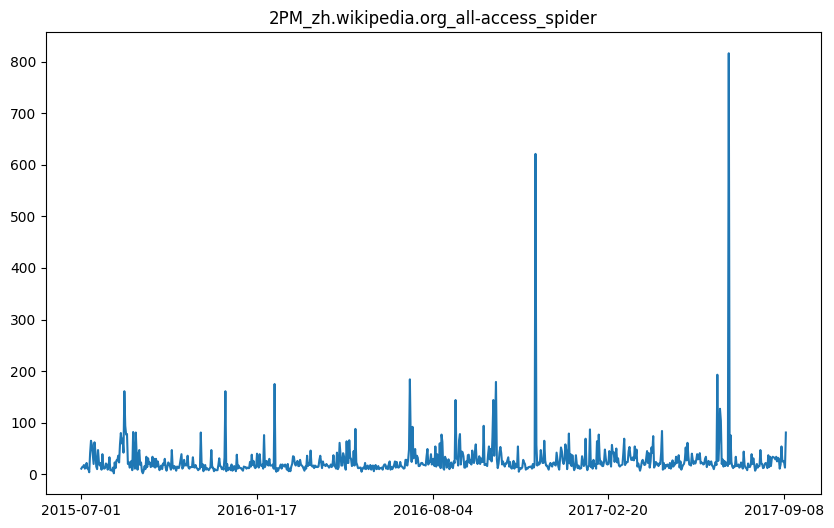

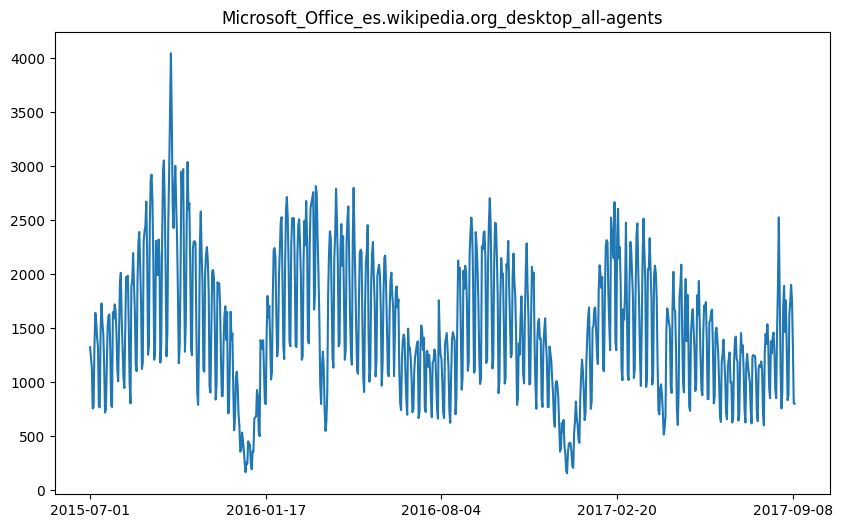

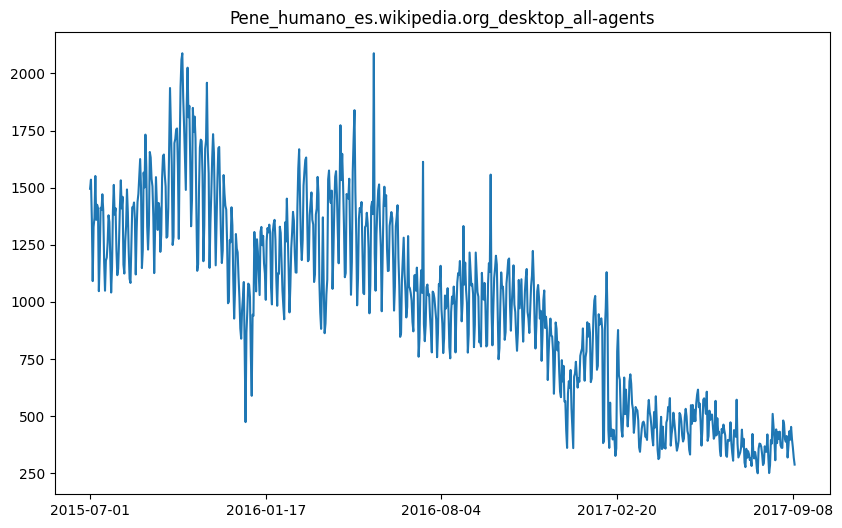

In [64]:
# 70366
# 70479 trend
s = 1

x = np.arange(0,train_data.shape[1]-1)

plt.figure(figsize=(10, 6))
plt.plot(x,train_data.iloc[s,1:])
#plt.axis([0, 550, 0, 1000])

plt.xticks([0,200,400,600,800], [train_data.columns[1], train_data.columns[201], train_data.columns[401], train_data.columns[601], train_data.columns[801]])
#plt.xlim(600, 805)

plt.title(train_data.iloc[s].iloc[0])
plt.show()

s = 70366

x = np.arange(0,train_data.shape[1]-1)

plt.figure(figsize=(10, 6))
plt.plot(x,train_data.iloc[s,1:])
#plt.axis([0, 550, 0, 1000])

plt.xticks([0,200,400,600,800], [train_data.columns[1], train_data.columns[201], train_data.columns[401], train_data.columns[601], train_data.columns[801]])
#plt.xlim(600, 805)

plt.title(train_data.iloc[s].iloc[0])
plt.show()

s = 70479

x = np.arange(0,train_data.shape[1]-1)

plt.figure(figsize=(10, 6))
plt.plot(x,train_data.iloc[s,1:])
#plt.axis([0, 550, 0, 1000])

plt.xticks([0,200,400,600,800], [train_data.columns[1], train_data.columns[201], train_data.columns[401], train_data.columns[601], train_data.columns[801]])
#plt.xlim(600, 805)

plt.title(train_data.iloc[s].iloc[0])
plt.show()

As can be seen in the plots above, time series have variable characteristics. Some show strong seasonal character (perhaps weekly, annual and biannual), others little or no seasonal character. Some have a consistent trend (in the case of Pene_humano_es.wikipidia.org_desktop_all-agents, a downward trend).

The seasonal components can be better identified through techniques like Fourier transforms and autocorrelation. First I will look at the Fourier transforms

401


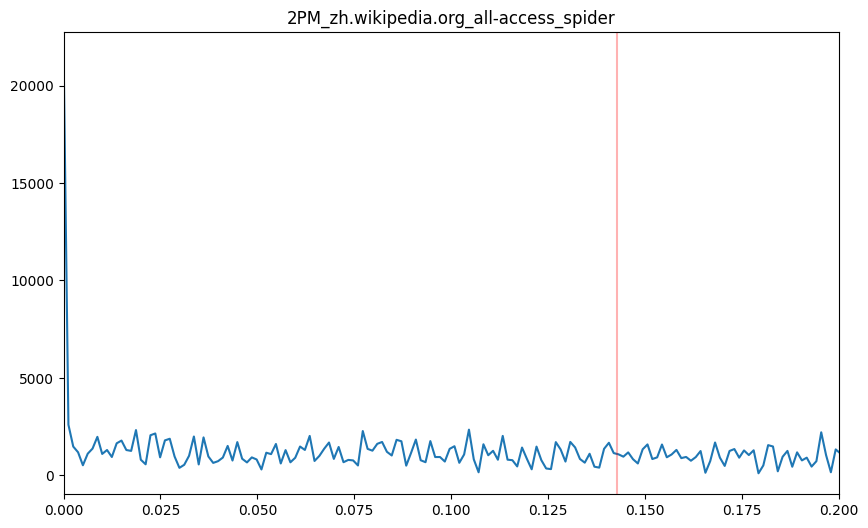

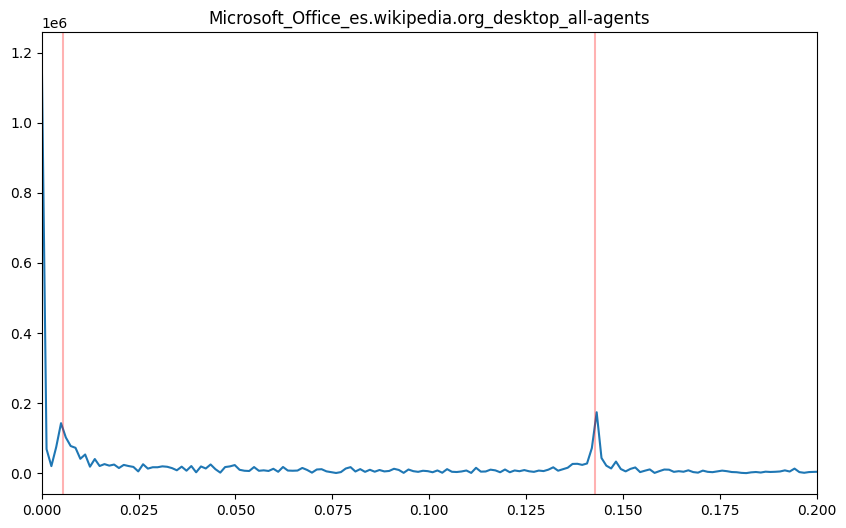

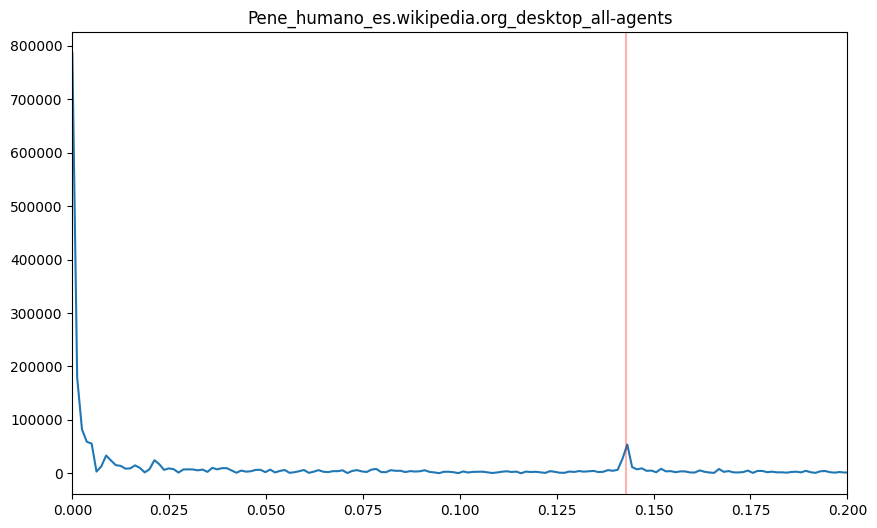

In [7]:
s = 1 

N  = train_data.shape[1]-1
row = train_data.iloc[s][1:]

fft_ = fft(row)
xf = fftfreq(N, 1)[:N//2]
print(len(xf))
fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_]

plt.figure(figsize=(10, 6))

plt.plot(xf,fft_mag[0:N//2])

plt.axvline(x=1./7,color='red',alpha=0.3)

plt.xlim(0,0.2)
plt.title(train_data.iloc[s].iloc[0])

plt.show()

s = 70366 

N  = train_data.shape[1]-1
row = train_data.iloc[s][1:]

fft_ = fft(row)

fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_]

plt.figure(figsize=(10, 6))

plt.plot(xf,fft_mag[0:N//2])

plt.axvline(x=1./7,color='red',alpha=0.3)
plt.axvline(x=1./182,color='red',alpha=0.3)

plt.xlim(0,0.2)

plt.title(train_data.iloc[s].iloc[0])

plt.show()

s = 70479

N  = train_data.shape[1]-1
row = train_data.iloc[s][1:]

fft_ = fft(row)

fft_mag = [np.sqrt(np.real(x)*np.real(x)+np.imag(x)*np.imag(x)) for x in fft_]

plt.figure(figsize=(10, 6))

plt.plot(xf,fft_mag[0:N//2])

plt.axvline(x=1./7,color='red',alpha=0.3)

plt.xlim(0,0.2)

plt.title(train_data.iloc[s].iloc[0])

plt.show()

We can see that both Microsoft_office_es.wikipidia.org_desktop_all-agents and Pene_humano_es.wikipidia.org_desktop_all-agents have a sharp peak at a frequency of 1/7 days$^{-1}$, which indicates weekly periodicity. Microsoft_office_es.wikipidia.org_desktop_all-agents also has a peak at a frequency of 1/182 days$^{-1}$, indicating biannual periodicity.

Next I will look at autocorrelation functions.

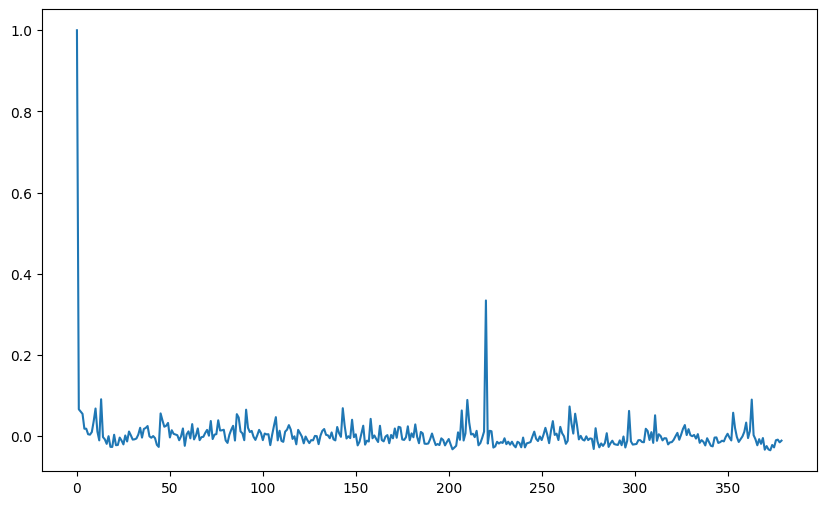

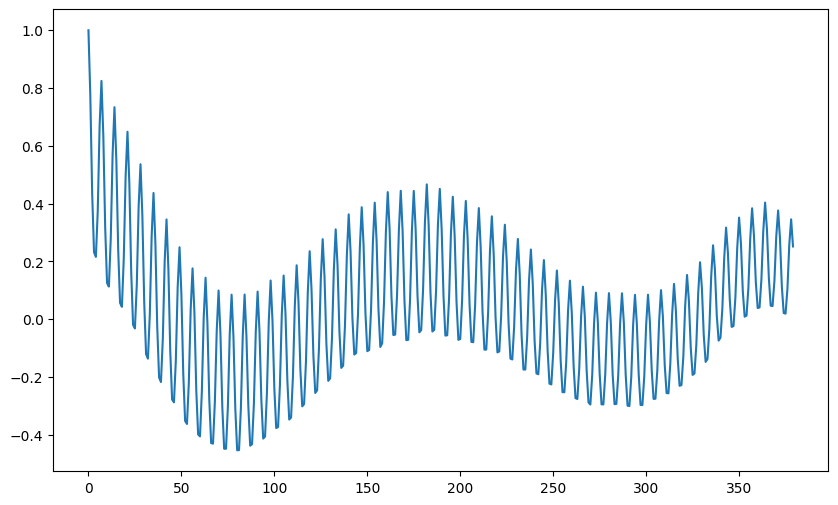

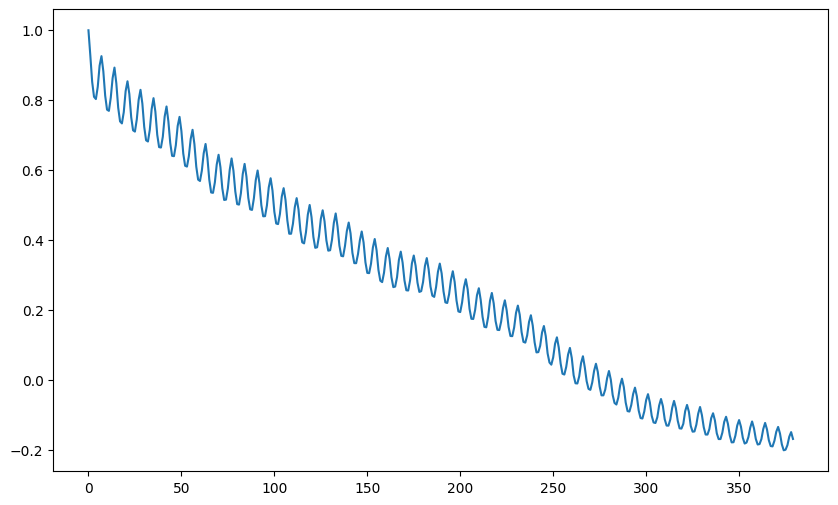

In [9]:
def autocorrelation(row):
    mean = row.mean()
    #print(mean)
    denominator = 0
    for i in range(len(row)):
        denominator += (row.iloc[i]-mean)*(row.iloc[i]-mean)
        #print(denominator)
    ac = []
    for k in range(380):
        numerator = 0
        for i in range(len(row)-k):
            numerator += (row.iloc[i]-mean)*(row.iloc[i+k]-mean)
        ac.append(numerator/denominator)
    return ac

indices = [1, 70366, 70479]
for s in indices:
    row = train_data.iloc[s].iloc[1:]
    ac = autocorrelation(row)

    plt.figure(figsize=(10, 6))
    x_val = np.arange(0,len(ac))
    plt.plot(x_val,ac)
#plt.axis([0, 550, 0, 1000])
#plt.xticks([0, 200, 400], [train_data.columns[1], train_data.columns[201], train_data.columns[401]])

    plt.show()

To forecast future values there are various simple approaches we could take. 

Median-- set all forecast values equal to the median.

Local median-- set all forecast values equal to the median of previous two months.

Naive seasonal-- set each forecast value equal to the value observed on that day a year ago.

But just one of these methods is not going to be optimal for all the time series. It would be useful to identify which of the methods would be suitable for each time series. For example, naive seasonal method is most suited for time series with a strong seasonal component and local median better for those with strong autocorrelation. 

One way to select the best method  is, for each time series, to compare the performance of the methods on the symmetric mean absolute percentage error (SMAPE) metric.

Before I do that, I need to address the missing values in the provided data. I deal with the missing data by replacing them with the median of the time series they belong to.

In [6]:
#train_data_ = train_data.fillna(method='ffill')
#train_data_ = train_data.ffill(axis=1)
def fill_na_with_median(row):
    median_value = row.iloc[1:].median()
    return row.fillna(median_value)

train_data_ = train_data.apply(fill_na_with_median, axis=1)

Now I make predictions for the last two months of the training data (July 11, 2017 - October 9, 2017).

In [7]:
# Median prediction
median = train_data_.iloc[:,1:742].median(axis=1,numeric_only=True)
median_pred = pd.concat([median] * 62, axis=1)
median_pred = median_pred.reset_index(drop=True)

In [8]:
# Local median prediction
median_local = train_data_.iloc[:,680:742].median(axis=1,numeric_only=True)
median_local_pred = pd.concat([median_local] * 62, axis=1)
median_local_pred = median_local_pred.reset_index(drop=True)

In [9]:
# Naive seasonal prediction
naive_seasonal_pred = train_data_.iloc[:,742-364:804-364]

In [10]:
# True values
test_data = train_data_.iloc[:,742:804]
test_data

,2017-07-11,2017-07-12,2017-07-13,2017-07-14,2017-07-15,2017-07-16,2017-07-17,2017-07-18,2017-07-19,2017-07-20,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,20.0,19.0,25.0,17.0,12.0,24.0,38.0,43.0,17.0,16.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,15.0,12.0,16.0,15.0,34.0,16.0,16.0,19.0,13.0,15.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,5.0,1.0,7.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,12.0,16.0,20.0,10.0,14.0,11.0,19.0,8.0,5.0,17.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,9.0,12.0,11.0,16.0,14.0,11.0,4.0,6.0,5.0,20.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,5.0,0.0,5.0,2.0,1.0,1.0,0.0,4.0,1.0,2.0,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,7.0,7.0,3.0,1.0,5.0,3.0,2.0,2.0,3.0,2.0,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,15.0,11.0,77.0,35.0,27.0,16.0,9.0,7.0,22.0,6.0,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,2.0,2.0,3.0,6.0,5.0,6.0,0.0,4.0,0.0,3.0,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


Now that I have the predictions produced using the median, local median and naive seasonal methods, I will evaluate them with SMAPE.

In [11]:
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 200.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.nanmean(diff)

In [14]:
# evaluate predictions with SMAPE
result_med = test_data.apply(lambda row: smape(np.array(row), np.array(median_pred.loc[row.name])), axis=1)
result_local_med = test_data.apply(lambda row: smape(np.array(row), np.array(median_local_pred.loc[row.name])), axis=1)
result_seasonal = test_data.apply(lambda row: smape(np.array(row), np.array(naive_seasonal_pred.loc[row.name])), axis=1)

results = pd.DataFrame({
    'median': result_med,
    'local median': result_local_med,
    'naive seasonal': result_seasonal
})

/tmp/ipykernel_33/1361444307.py:3: RuntimeWarning: invalid value encountered in divide
  diff = np.abs(y_true - y_pred) / denominator


Now I will identify the method with the lowest error for each time series.

In [15]:
results['min'] = results.min(axis=1)
results['best method'] = results.iloc[:,0:3].idxmin(1)
results_mean = results.mean(numeric_only=True)
results.loc['mean'] = results_mean
results

,median,local median,naive seasonal,min,best method
0,35.761345,32.638081,42.223022,32.638081,local median
1,36.348995,40.630855,56.363347,36.348995,median
2,59.695256,59.695256,65.992719,59.695256,median
3,35.297041,36.049718,51.970874,35.297041,median
4,60.262346,50.970661,124.688426,50.970661,local median
...,...,...,...,...,...
145059,96.956296,83.074511,96.956296,83.074511,local median
145060,79.206327,86.430987,79.206327,79.206327,median
145061,83.588013,68.630620,83.588013,68.630620,local median
145062,101.279430,79.112541,101.279430,79.112541,local median


This table shows the SMAPE values for each time series. The last column in the table has the method which produced the minimum error. The last row of the table has the average error for each of the methods and the average if we choose the lowest error of each method. The local median method applied to all time series performs quite well, but combining three methods produces even better accuracy. 

Below I've plotted some of the predictions. The forecasts are in orange.

median


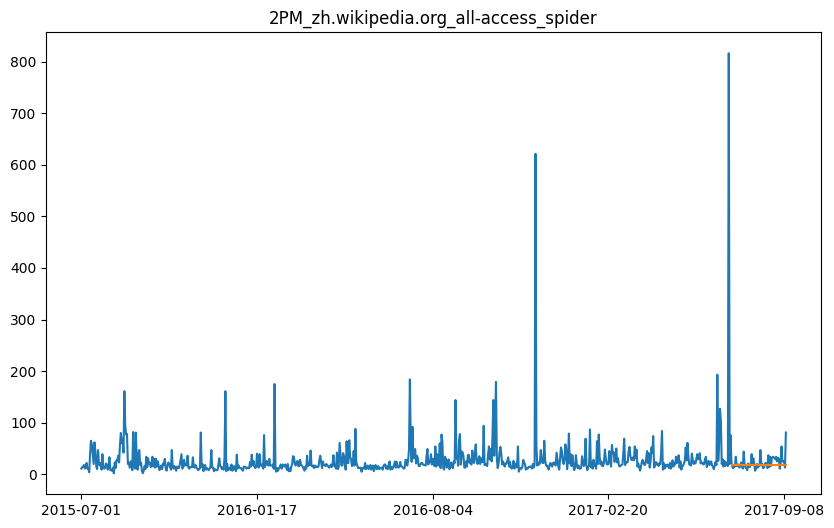

naive seasonal


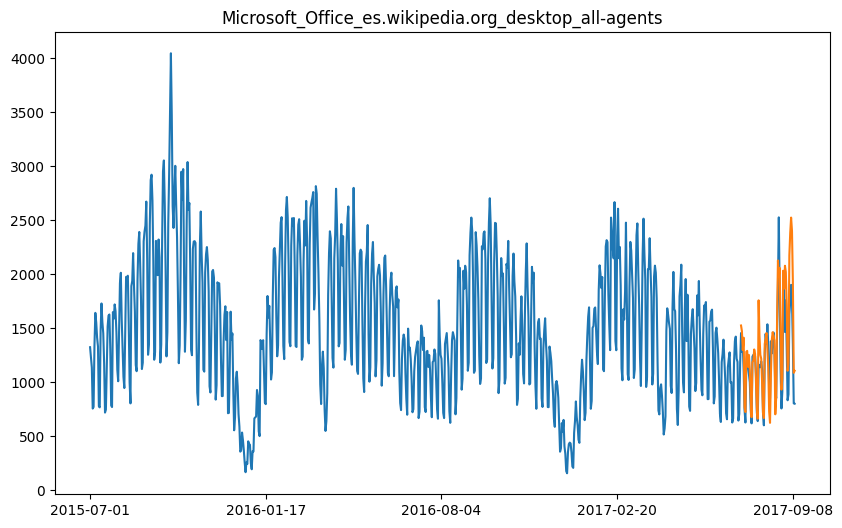

local median


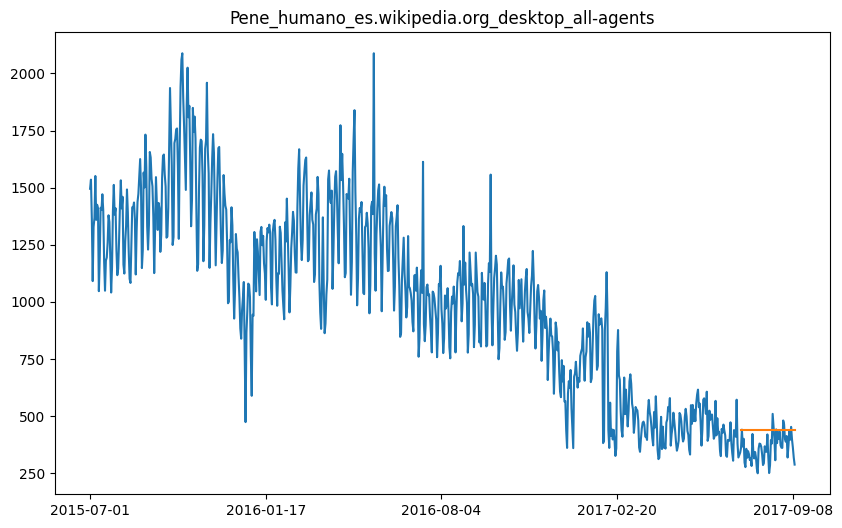

In [16]:
s = 1

method = results.iloc[s,4]
print(method)

x = np.arange(0,train_data.shape[1]-1)

plt.figure(figsize=(10, 6))
plt.plot(x,train_data_.iloc[s,1:])
#plt.axis([0, 550, 0, 1000])

x_ = np.arange(741,803)
plt.plot(x_,np.array(median_pred.iloc[s][:]))

plt.xticks([0,200,400,600,800], [train_data.columns[1], train_data.columns[201], train_data.columns[401], train_data.columns[601], train_data.columns[801]])
#plt.xlim(600, 805)

plt.title(train_data.iloc[s].iloc[0])

plt.show()

s = 70366

method = results.iloc[s,4]
print(method)

x = np.arange(0,train_data.shape[1]-1)

plt.figure(figsize=(10, 6))
plt.plot(x,train_data_.iloc[s,1:])
#plt.axis([0, 550, 0, 1000])

x_ = np.arange(741,803)
plt.plot(x_,np.array(naive_seasonal_pred.iloc[s][:]))

plt.xticks([0,200,400,600,800], [train_data.columns[1], train_data.columns[201], train_data.columns[401], train_data.columns[601], train_data.columns[801]])
#plt.xlim(600, 805)

plt.title(train_data.iloc[s].iloc[0])

plt.show()

s = 70479

method = results.iloc[s,4]
print(method)

x = np.arange(0,train_data.shape[1]-1)

plt.figure(figsize=(10, 6))
plt.plot(x,train_data_.iloc[s,1:])
#plt.axis([0, 550, 0, 1000])

x_ = np.arange(741,803)
plt.plot(x_,np.array(median_local_pred.iloc[s][:]))

plt.xticks([0,200,400,600,800], [train_data.columns[1], train_data.columns[201], train_data.columns[401], train_data.columns[601], train_data.columns[801]])
#plt.xlim(600, 805)

plt.title(train_data.iloc[s].iloc[0])

plt.show()

Now I will evaluate the methods on the test data, making forecasts for page views between September 13th, 2017 and November 13th, 2017. I create a 'mixed' submission consisting of forecasts produced by the method with the lowest SMAPE error on the train data.

In [17]:
indices_localmedian = results.index[results['best method'] == 'local median'].tolist()
indices_median = results.index[results['best method'] == 'median'].tolist()
indices_seasonal = results.index[results['best method'] == 'local seasonal'].tolist()

In [18]:
median = train_data_.median(axis=1,numeric_only=True)
medians = pd.concat([median] * 62, axis=1)

In [19]:
median_local = train_data_.iloc[:,742:].median(axis=1)
medians_local = pd.concat([median_local] * 62, axis=1)
indices_notlocalmedian = indices_seasonal + indices_median

In [20]:
medians_local.loc[indices_notlocalmedian, :] = None

In [21]:
medians_comb = medians.copy()
medians_comb.update(medians_local)

In [22]:
naive_seasonal = train_data_.iloc[:,806-364:868-364]
naive_seasonal.columns = [i for i in range(62)]

In [23]:
indices_notseasonal = indices_localmedian + indices_median
naive_seasonal.loc[indices_notseasonal, :] = None

In [24]:
preds = medians_comb.copy()
preds.update(naive_seasonal)

In [25]:
dates = pd.date_range('2017-09-13', '2017-11-13')
preds.columns = [dates[i] for i in range(62)]
preds

,2017-09-13,2017-09-14,2017-09-15,2017-09-16,2017-09-17,2017-09-18,2017-09-19,2017-09-20,2017-09-21,2017-09-22,...,2017-11-04,2017-11-05,2017-11-06,2017-11-07,2017-11-08,2017-11-09,2017-11-10,2017-11-11,2017-11-12,2017-11-13
0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0
1,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,...,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0
2,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,...,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0,14.0
4,15.5,15.5,15.5,15.5,15.5,15.5,15.5,15.5,15.5,15.5,...,15.5,15.5,15.5,15.5,15.5,15.5,15.5,15.5,15.5,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
145059,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
145060,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0
145061,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0


Now I prepare the forecasts for submission.

In [26]:
sample_submission = pd.read_csv(os.path.join(dirname, 'sample_submission_2.csv.zip'),compression = "zip")

In [27]:
keys = pd.read_csv(os.path.join(dirname, 'key_2.csv.zip'),compression = "zip")

In [28]:
keys['date'] = keys['Page'].apply(lambda x: x.split('_')[-1])
keys['Page'] = keys['Page'].apply(lambda x: '_'.join(x.split('_')[:-1]))
keys['date'] = pd.to_datetime(keys['date'], format='%Y-%m-%d')

In [29]:
sub = sample_submission.merge(keys, on='Id', how='left')
sub['date'] = pd.to_datetime(sub['date'], format='%Y-%m-%d')
sub.head()

,Id,Visits,Page,date
0,0b293039387a,0,007_スペクター_ja.wikipedia.org_all-access_all-agents,2017-09-13
1,7114389dd824,0,007_スペクター_ja.wikipedia.org_all-access_all-agents,2017-09-14
2,057b02ff1f09,0,007_スペクター_ja.wikipedia.org_all-access_all-agents,2017-09-15
3,bd2aca21caa3,0,007_スペクター_ja.wikipedia.org_all-access_all-agents,2017-09-16
4,c0effb42cdd5,0,007_スペクター_ja.wikipedia.org_all-access_all-agents,2017-09-17


In [30]:
preds['Page'] = train_data['Page']
pred_flat = pd.melt(preds, id_vars='Page', var_name='date')
pred_flat['date'] = pd.to_datetime(pred_flat['date'], format='%Y-%m-%d')
pred_flat.head()

,Page,date,value
0,2NE1_zh.wikipedia.org_all-access_spider,2017-09-13,22.0
1,2PM_zh.wikipedia.org_all-access_spider,2017-09-13,19.0
2,3C_zh.wikipedia.org_all-access_spider,2017-09-13,3.0
3,4minute_zh.wikipedia.org_all-access_spider,2017-09-13,14.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,2017-09-13,15.5


In [31]:
sub_mixed = sub.merge(pred_flat, on=['Page','date'])[['Id', 'value']]
sub_mixed=sub_mixed.rename(columns={'value': 'Visits'})

In [32]:
sub_mixed

,Id,Visits
0,0b293039387a,517.0
1,7114389dd824,517.0
2,057b02ff1f09,517.0
3,bd2aca21caa3,517.0
4,c0effb42cdd5,517.0
...,...,...
8993901,f78fbaa305ad,223.5
8993902,33aecaf259d1,223.5
8993903,a36228b64466,223.5
8993904,26887d3e5c99,223.5


In [48]:
sub_mixed.to_csv('submission_mixed.csv', index=False)

The SMAPE score of my mixed submission is 40.3. This is a significant improvement on my local median submission (41.9).

This is a very straightforward, low-cost method for making decent predictions. In order to improve on this we can use other methods commonly applied to time series like ARIMA models or neural networks (future notebook).